# Image block segmentation: Part II

In [1]:
!pip install Pillow
!pip install numpy
!pip install opencv-python-headless

In [2]:
from PIL import Image # Pillow package
import cv2 # Open CV package
import numpy as np # Numpy package
import math
from collections import defaultdict # "reading" lines of the bounding boxes

In [3]:
try:
    sample_image_path = "./kip-images/17_12_2021_Nation_MyNetWork_pg9 annotated (1px).png"
    image = Image.open(sample_image_path)

except:
    sample_image_path = r"/home/jovyan/book/kenyans-in-print/kip-images/17_12_2021_Nation_MyNetWork_pg9 annotated (1px).png"
    image = Image.open(sample_image_path)

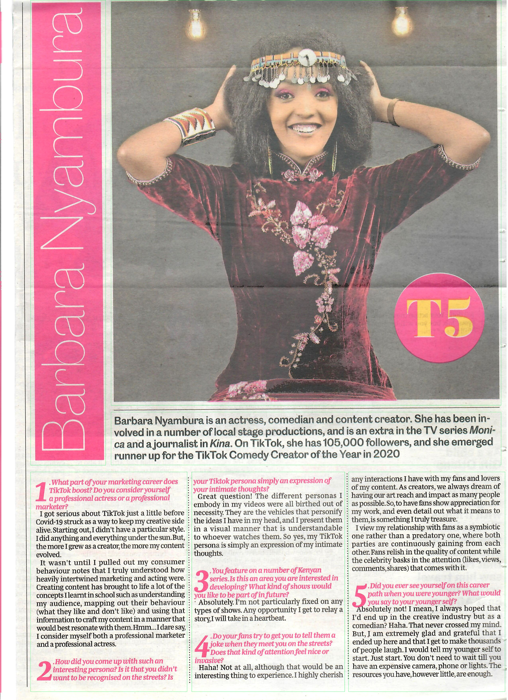

In [4]:
width, height = image.size
display(image.resize(
    (int(width*0.2),int(height*0.2))
    ))

In [5]:
colour = (0,232,72)

# Retrieve a tuple indices of two arrays where the first array contains
# the x-coordinates of the pixels of color (0,232,72)
# and the second array contains the y-coordinates of those pixels.
indices = np.where(cv2.imread(sample_image_path) == colour) 

# Use the zip() method to get a list of tuples containing those points
coordinates = zip(indices[0], indices[1])

# Since this is a color image with three channels each coordinate will be repeated thrice.
# Use set() method to keep only the unique coordinates.
unique_coordinates = list(set(list(coordinates)))

len(unique_coordinates)

104843

Key assumptions are:
* Horizontal lines would share an identical $x$ value and have $y$ values that follow an unbroken sequence
* Vertical lines would share an identical $y$ value and have $x$ values that follow an unbroken sequence

In [6]:
from collections import defaultdict

horizontals = defaultdict(list)

for a, b in unique_coordinates:
    horizontals[f"y_value of {b}"].append(a)

In [7]:
unique_coordinates[0:3]

[(1426, 1418), (2181, 762), (2733, 1275)]

In [8]:
max(horizontals[list(horizontals.keys())[0]])

3044

In [9]:
list(horizontals.keys())[0:3]

['y_value of 1418', 'y_value of 762', 'y_value of 1275']

In [10]:
horizontals['y_value of 1418']

[1426,
 0,
 2580,
 3044,
 2028,
 390,
 391,
 397,
 2711,
 2644,
 2713,
 2910,
 394,
 393,
 2646,
 2659,
 2264,
 381,
 395]

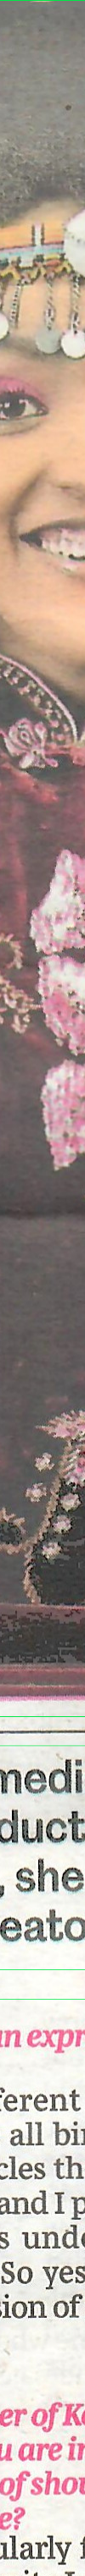

In [11]:
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cropped = Image.fromarray(img[0:3044,1418:1518])

display(cropped)

https://stackoverflow.com/questions/51164713/how-to-get-pixel-coordinates-if-i-know-colorrgb

https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

https://stackoverflow.com/questions/50624389/how-to-group-list-of-tuples